Data Connections https://www.kaggle.com/competitions/titanic/data

In [1]:
import pandas as pd
data = pd.read_csv("train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [2]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The null data percentage is:
 PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64


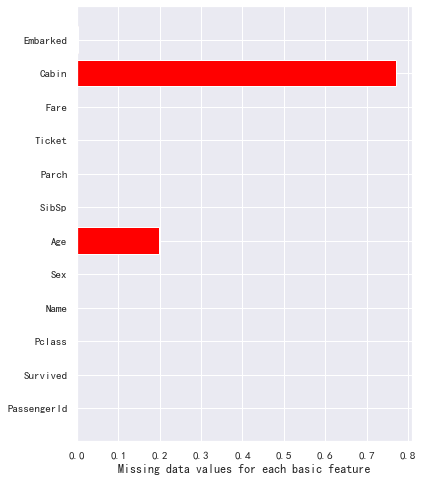

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False


#The lack of each feature of the data set and its graphical display
null_percentage = data.isnull().sum()/len(data)

print ('The null data percentage is:\n',null_percentage)


null_percentage = null_percentage.reset_index()

null_percentage.columns = ['column_name','column_value']

ind = np.arange(null_percentage.shape[0])
fig , ax = plt.subplots(figsize = (6, 8))
rects = ax.barh(ind,null_percentage.column_value.values,color='red')
ax.set_yticks(ind)
ax.set_yticklabels(null_percentage.column_name.values,rotation='horizontal')
ax.set_xlabel("Missing data values for each basic feature")
plt.show()

# Data preprocessing

In [5]:
# Missing value filling
data=data.dropna(thresh=data.shape[1]*0.5,axis=0)
data.fillna(method='ffill',inplace=True)
data.fillna(method='bfill',inplace=True)

D:\work_app\anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


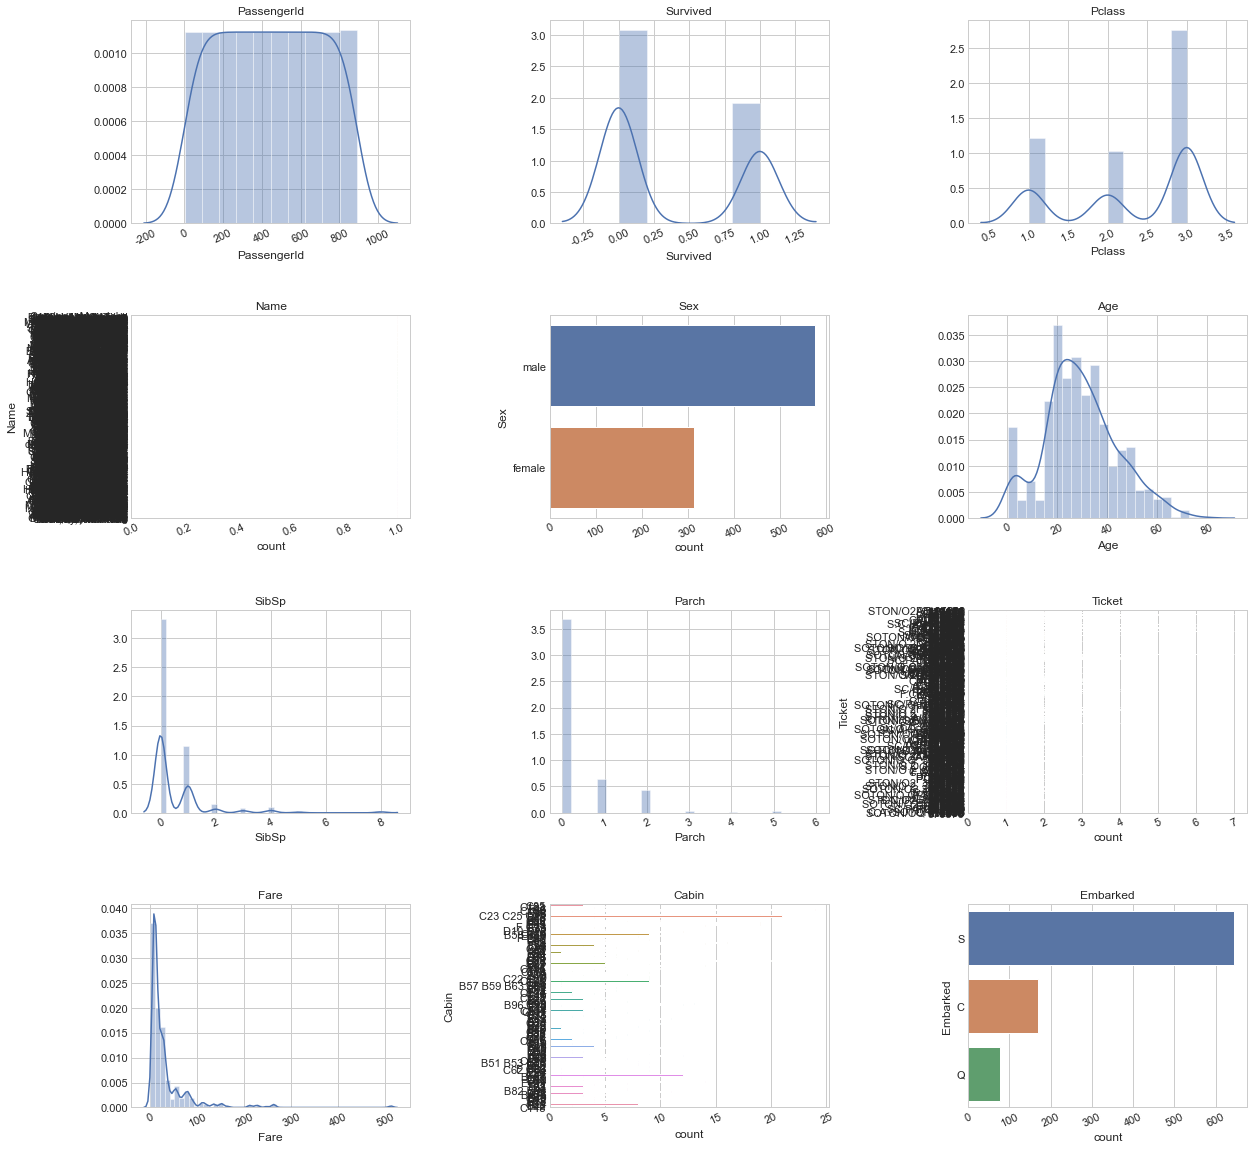

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import math
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(data, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

In [7]:
from sklearn.preprocessing import LabelEncoder
for i, column in enumerate(data.columns):
    if data.dtypes[column] == np.object:
        lbl = LabelEncoder().fit(data[column])
        data[column] = lbl.transform(data[column])

# Model Construction

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim

#data preprocessing
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)  
data = data.dropna()  
X = data.drop(['Survived'], axis=1).values  #
y = data['Survived'].values  
# convert to tensor
X_tensor = torch.tensor(X, dtype=torch.float)
y_tensor = torch.tensor(y, dtype=torch.float)

# define model
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(7, 1) 

    def forward(self, x):
        out = torch.sigmoid(self.linear(x))
        return out

model = LogisticRegression()

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss function
optimizer = optim.SGD(model.parameters(), lr=0.01)





# Train Model & Select Model

In [9]:

# training model
num_epochs = 10000
for epoch in range(num_epochs):
    # Forward propagation and computing loss
    y_pred = model(X_tensor)
    loss = criterion(y_pred.squeeze(), y_tensor)

    # Backpropagation and optimizer updates
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # output the loss every 100 iterations
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# forecast result
with torch.no_grad():
    y_pred = model(X_tensor)
    y_pred_class = y_pred.round().squeeze().numpy()

Epoch [100/10000], Loss: 1.0896
Epoch [200/10000], Loss: 1.2349
Epoch [300/10000], Loss: 0.7198
Epoch [400/10000], Loss: 1.0173
Epoch [500/10000], Loss: 0.9874
Epoch [600/10000], Loss: 0.7029
Epoch [700/10000], Loss: 0.7949
Epoch [800/10000], Loss: 0.6802
Epoch [900/10000], Loss: 0.8297
Epoch [1000/10000], Loss: 0.6671
Epoch [1100/10000], Loss: 0.7630
Epoch [1200/10000], Loss: 1.3297
Epoch [1300/10000], Loss: 1.3173
Epoch [1400/10000], Loss: 0.6035
Epoch [1500/10000], Loss: 0.6153
Epoch [1600/10000], Loss: 0.8062
Epoch [1700/10000], Loss: 0.6026
Epoch [1800/10000], Loss: 0.6343
Epoch [1900/10000], Loss: 0.9467
Epoch [2000/10000], Loss: 0.5340
Epoch [2100/10000], Loss: 0.6123
Epoch [2200/10000], Loss: 0.9602
Epoch [2300/10000], Loss: 0.6353
Epoch [2400/10000], Loss: 0.6813
Epoch [2500/10000], Loss: 0.9730
Epoch [2600/10000], Loss: 0.8190
Epoch [2700/10000], Loss: 0.7073
Epoch [2800/10000], Loss: 0.9634
Epoch [2900/10000], Loss: 0.8062
Epoch [3000/10000], Loss: 0.7069
Epoch [3100/10000],

# Performance

In [10]:
# Calculation accuracy
accuracy = (y_pred_class == y).mean()
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.7205
